# Función de Distribución de Probabilidad
La Función de Distribución es la probabilidad de que la variable tome valores iguales o inferiores a x.
Pueden ser representadas gráficamente con el diagrama de barras o histograma.

$F(x) = P(X \leq x)$

## Distribución Uniforme
Cada uno de los elementos del espacio muestral toma probabilidades idénticas.

La distribución uniforme continua es una familia de distribuciones de probabilidad para variables aleatorias continuas, tales que para cada miembro de la familia, todos los intervalos de igual longitud en la distribución en su rango son igualmente probables. El dominio está definido por dos parámetros, *a* y *b*, que son sus valores mínimo y máximo respectivamente.

$F(x) = 1/(b-a)$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generar num aleatorios que son igual x-probables entre ellos
a = 1
b = 100
n = 1000
data = np.random.uniform(a, b, n)

(array([ 90.,  99., 101.,  99.,  93.,  99.,  94., 101., 117., 107.]),
 array([ 1.0273958 , 10.92368531, 20.81997483, 30.71626435, 40.61255387,
        50.50884339, 60.4051329 , 70.30142242, 80.19771194, 90.09400146,
        99.99029098]),
 <BarContainer object of 10 artists>)

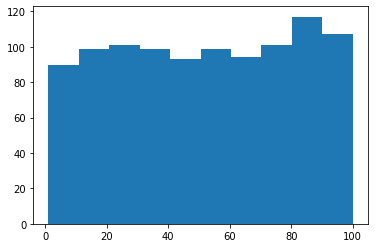

In [3]:
%matplotlib inline
plt.hist(data)

## Distribución Normal o Campana de Gauss

In [2]:
# randn genera numeros aleatorios que siguen la func normal estandar
data = np.random.randn(1000)

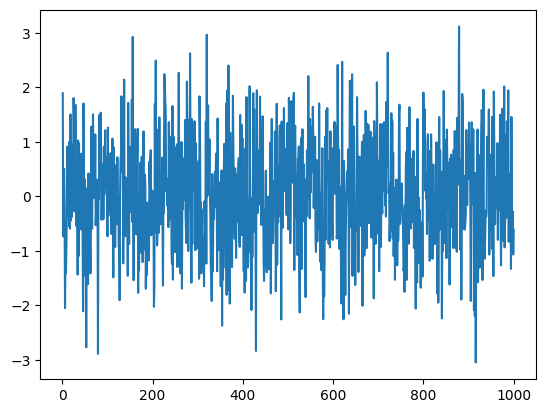

In [3]:
# Grafica para mostrar los valores
x = range(1, 1001)
plt.plot(x, data)

(array([  4.,  25.,  81., 161., 240., 215., 157.,  86.,  26.,   5.]),
 array([-3.04620465, -2.42993695, -1.81366924, -1.19740153, -0.58113382,
         0.03513388,  0.65140159,  1.2676693 ,  1.883937  ,  2.50020471,
         3.11647242]),
 <BarContainer object of 10 artists>)

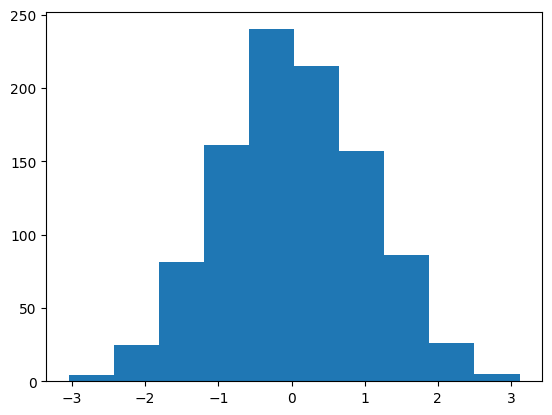

In [4]:
# Histograma para mostrar los valores como func normal estandar
plt.hist(data)

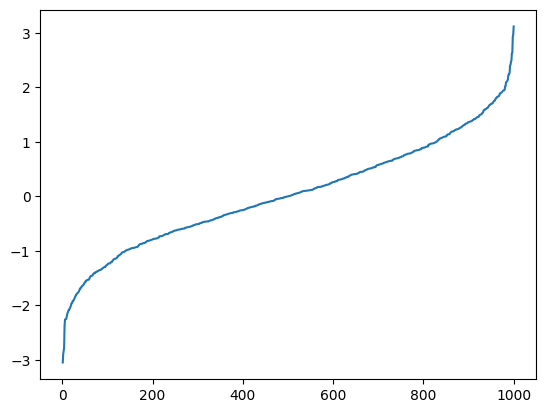

In [6]:
# Gráfica de Distribución acumulada
plt.plot(x, sorted(data))

In [8]:
mu = 5.5 # Media
sd = 2.5 # Normal estandar
s = np.random.randn(10000) # Normal  z = (x - mu) / sd -> N(0, 1), X = mu + sd * z
data = mu+sd*s

(array([  32.,  228.,  706., 1640., 2497., 2574., 1541.,  589.,  156.,
          37.]),
 array([-2.77837252, -1.08991321,  0.59854609,  2.2870054 ,  3.97546471,
         5.66392401,  7.35238332,  9.04084263, 10.72930193, 12.41776124,
        14.10622055]),
 <BarContainer object of 10 artists>)

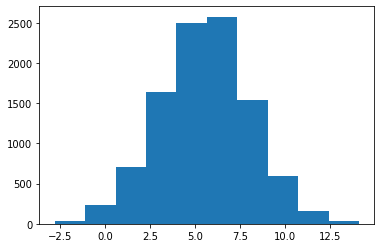

In [9]:
plt.hist(data)

## Simulación de Monte Carlo para calcular el valor de Pi

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π. 

In [10]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(np.power(x[j],2) + np.power(y[j],2))
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1425359999999993


(3.1425359999999993, [<matplotlib.lines.Line2D at 0x7f2b15f14d30>])

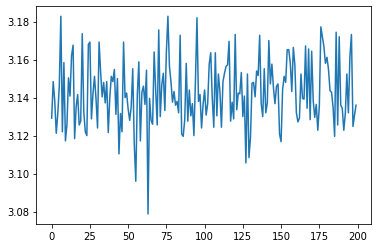

In [11]:
pi_montecarlo(10000, 200)

### Dummy Data Sets
Lista o array de numeros aleatorios

In [12]:
n = 100000
data = pd.DataFrame({
    'A': np.random.randn(n), # normal estandar
    'B': 1.5 + 2.5 * np.random.randn(n), # normal
    'C': np.random.uniform(5, 32, n) # uniforme
    })

In [13]:
data.describe()

,A,B,C
count,100000.000000,100000.000000,100000.000000
mean,0.005201,1.503858,18.511642
std,0.998976,2.502841,7.788848
min,-5.242470,-9.294351,5.000360
25%,-0.671133,-0.194950,11.768305
50%,0.003553,1.508840,18.470380
75%,0.680046,3.205883,25.267617
max,4.541210,11.724911,31.999757


(array([2.0000e+00, 4.2000e+01, 9.2800e+02, 8.1800e+03, 2.6971e+04,
        3.7166e+04, 2.1278e+04, 4.9560e+03, 4.6000e+02, 1.7000e+01]),
 array([-5.24247048, -4.26410241, -3.28573434, -2.30736628, -1.32899821,
        -0.35063014,  0.62773792,  1.60610599,  2.58447406,  3.56284212,
         4.54121019]),
 <BarContainer object of 10 artists>)

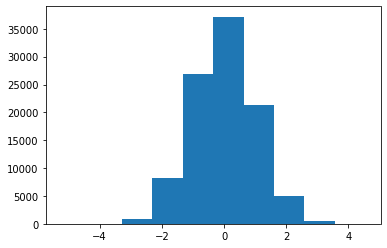

In [14]:
plt.hist(data['A'])

(array([2.5000e+01, 4.1000e+02, 3.1790e+03, 1.3419e+04, 2.8371e+04,
        3.0988e+04, 1.7739e+04, 5.0780e+03, 7.4200e+02, 4.9000e+01]),
 array([-9.29435084, -7.19242467, -5.09049849, -2.98857232, -0.88664615,
         1.21528003,  3.3172062 ,  5.41913237,  7.52105854,  9.62298472,
        11.72491089]),
 <BarContainer object of 10 artists>)

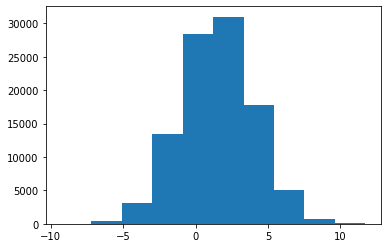

In [15]:
plt.hist(data['B'])

(array([ 9905.,  9969., 10042., 10047., 10139.,  9904., 10020.,  9880.,
        10002., 10092.]),
 array([ 5.00036025,  7.70029995, 10.40023965, 13.10017936, 15.80011906,
        18.50005876, 21.19999846, 23.89993817, 26.59987787, 29.29981757,
        31.99975727]),
 <BarContainer object of 10 artists>)

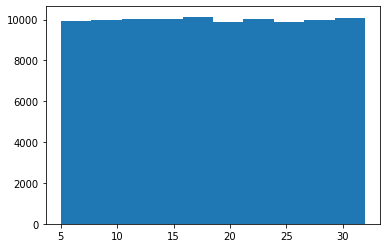

In [16]:
plt.hist(data['C'])

In [17]:
data = pd.read_csv("python-ml-course-master/datasets/customer-churn-model/Customer Churn Model.txt")

In [18]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [19]:
col_names = data.columns.values.tolist()

In [21]:
a = len(col_names)
a

21

In [24]:
new_data = pd.DataFrame({
    'Column Name': col_names,
    'A': np.random.randn(a),
    'B': np.random.uniform(0,1,a),
    }, index=range(42, 42 + a))

In [25]:
new_data

,Column Name,A,B
42,State,1.693365,0.758827
43,Account Length,-0.473261,0.626862
44,Area Code,-0.741947,0.139141
45,Phone,-0.905641,0.889448
46,Int'l Plan,0.189926,0.977990
47,VMail Plan,0.721621,0.664715
48,VMail Message,1.967844,0.032599
49,Day Mins,0.091040,0.879898
50,Day Calls,2.166757,0.121927
51,Day Charge,0.405918,0.648087
